In [1]:
%matplotlib inline
import pandas as pd
import seaborn as s
import matplotlib.pyplot as p

In [2]:
titles=pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [6]:
k=pd.read_csv('release_dates.csv')
k.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [5]:
vs=pd.read_csv('cast.csv')
vs.head()


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?


In [9]:
a= vs[vs['character'].str.contains('Superman|Batman', case=False,na=False)]
b = a.groupby(['year', 'character']).size().unstack(fill_value=0)
b['Superman - Batman'] = b['Superman'] - b['Batman']
c = len(b[b['Superman - Batman'] > 0])
print("Number of Superman years:", c)

Number of Superman years: 11


# How many years have been "Batman years", with more Batman characters than Superman characters?



In [14]:
a= vs[vs['character'].str.contains('Superman|Batman', case=False,na=False)]
b = a.groupby(['year', 'character']).size().unstack(fill_value=0)
b['Batman - Superman'] = b['Batman']-b['Superman']
c = len(b[b['Batman - Superman'] > 0])
print("Number of Batman years:", c)

Number of Batman years: 27


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.


<Axes: xlabel='year'>

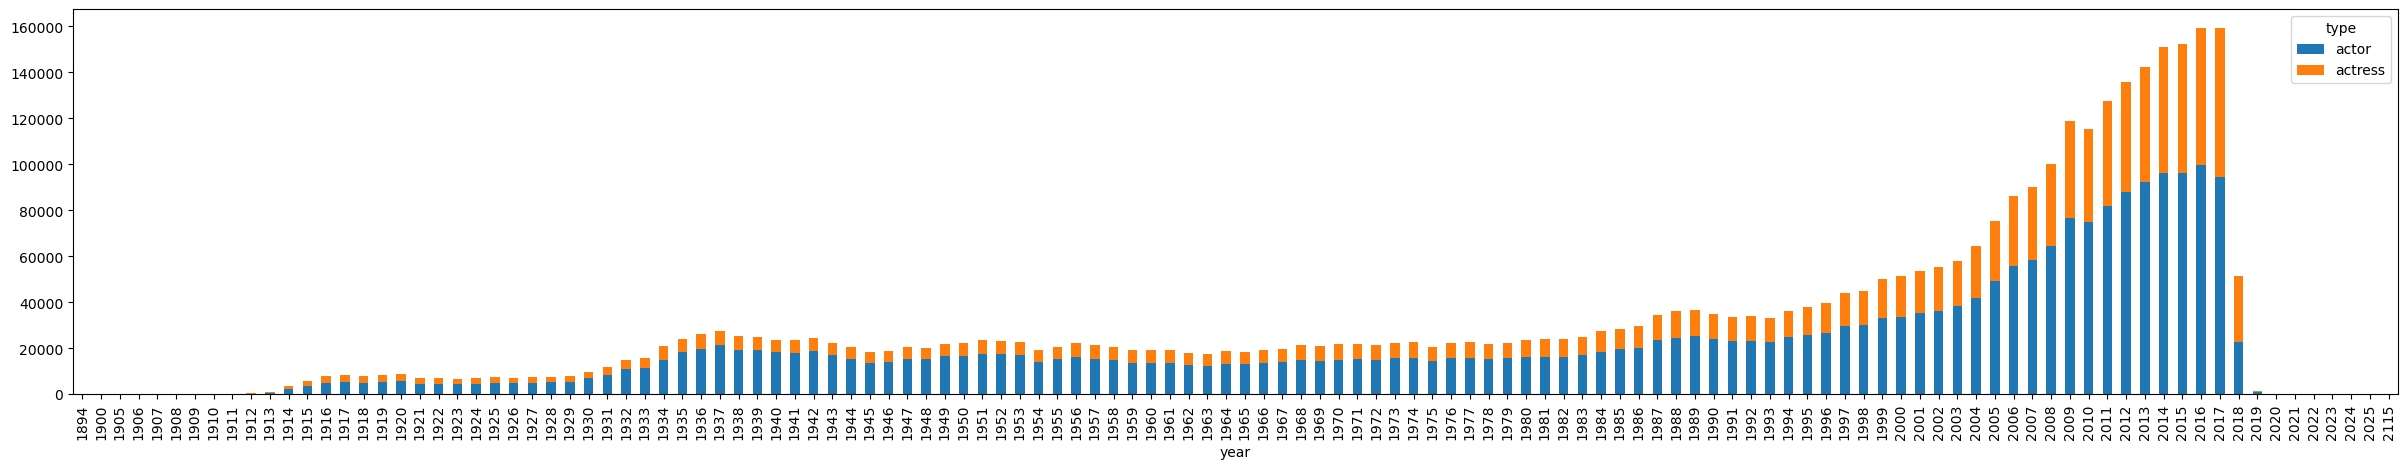

In [26]:
a=vs.groupby(['year','type']).size().unstack(fill_value=0)
x=a.plot.bar(stacked=True,figsize=(30,5))
x

# p.bar(a['year'],a['type'],width=5,axis=False)
# p.xlable("Year")
# p.ylable("NO of years")


# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.


<Axes: xlabel='year'>

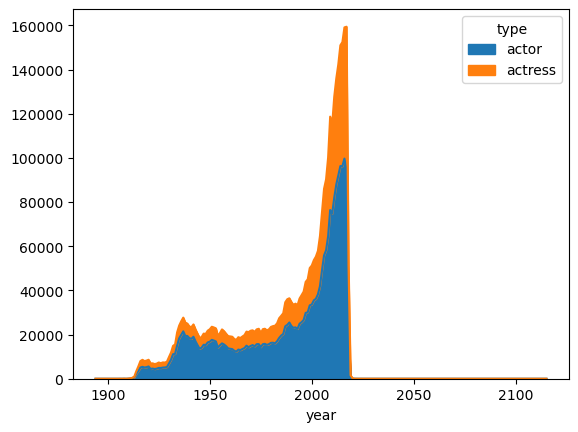

In [29]:
a=vs.groupby(['year','type']).size().unstack(fill_value=0)
a.plot.area(stacked=True)


# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

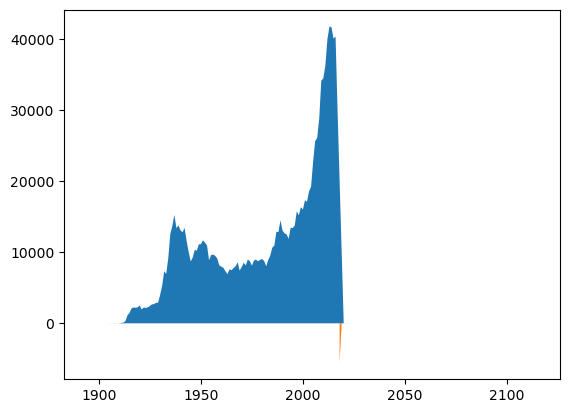

In [46]:
import matplotlib.pyplot as p
v=vs[vs['type'].str.contains('actor|actress',case=False,regex=True)]
a=v.groupby(['year','type']).size().unstack(fill_value=0)
m=a.copy()
m['act_acts']=a['actor']-a['actress']
p1=m[m['act_acts']>0]
n=m[m['act_acts']<0]
fig,ax=p.subplots()
ax.fill_between(p1.index,0,p1['act_acts'],label='Positive')
ax.fill_between(n.index,0,n['act_acts'],label='Negative')
p.show()

# Plot the fraction of roles that have been 'actor' roles each year in the history of film.


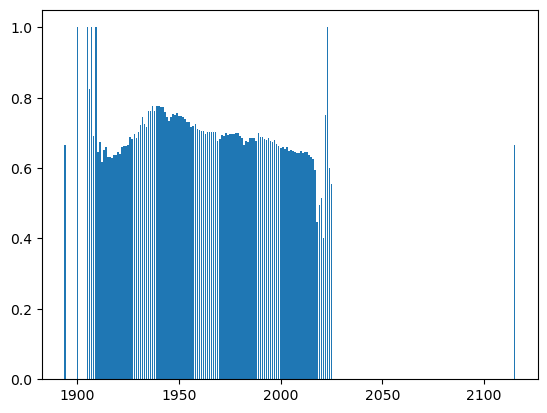

In [53]:
import matplotlib.pyplot as p
a=vs.groupby(['year','type']).size().unstack(fill_value=0)
v=a['actor']/(a['actor']+a['actress'])
p.bar(a.index,v)
p.show()

# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.


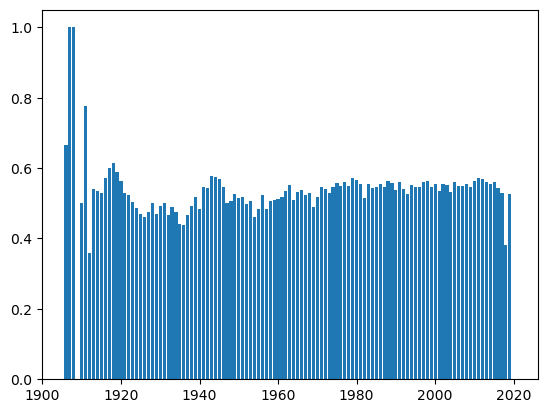

In [58]:
import matplotlib.pyplot as p
m=vs[vs['n']==2]
a=m.groupby(['year','type']).size().unstack(fill_value=0)
v=a['actor'] / (a['actor'] + a['actress'])
p.bar(a.index,v)
p.show()

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor roles for each year in the history of film.

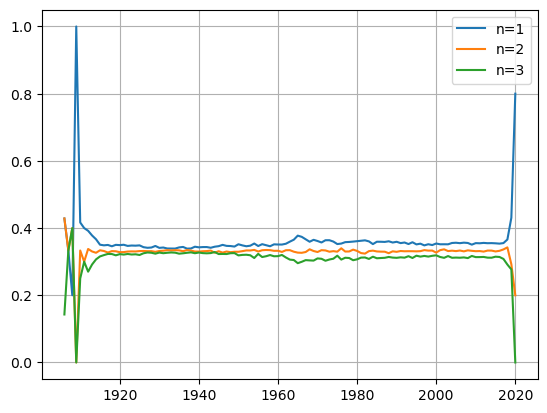

In [95]:
import matplotlib.pyplot as plt
m = vs[vs['n'].between(1, 3)]
a = m.groupby(['year', 'n']).size().unstack(fill_value=0)
k = a.div(a.sum(axis=1), axis=0)
for n in range(1, 4):
    plt.plot(k.index, k[n], label=f'n={n}')

plt.legend()

plt.grid(True)
plt.show()
